In [1]:
1 + 1

2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [3]:
from my_tools import *

In [4]:
# Q_BITCOIN
BTC = CoinDataMgr(blocksci_path="/home/ubuntu/bitcoin",
                  path_to_clusters="/home/ubuntu/~/clusters_b",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/bitcoin")

Got 523426 blocks
Got 206433637 clusters


In [5]:
#BTC.getUnspents()

In [27]:
#BTC[S_UNSPENTS].save('par')

In [6]:
BTC[S_GINIS].readAll()
BTC[S_REL_FLOWS].readAll()
BTC[S_FEES].readAll()
BTC[S_NCS].readAll()
BTC[S_UNSPENTS].readAll()
BTC[S_NONEMPTY_CLS].readAll()
BTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_log21.json', key is 'log21'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_log.json', key is 'log'
  Got 'int1000b_relativeFlowVolumes_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_log.json', key is 'log'
  Got 'int1000b_fees_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calcu

In [7]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'nonPar',
                              S_UNSPENTS:'par', S_NONEMPTY_CLS:'log'})
tag_filtered_b = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

Gathered under tag 'NacamotoCoefs=_relativeFlowVolumes=log_fees=nonPar_unspents=par_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21'


/home/ubuntu/thesis_work/my_tools.py:1099: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


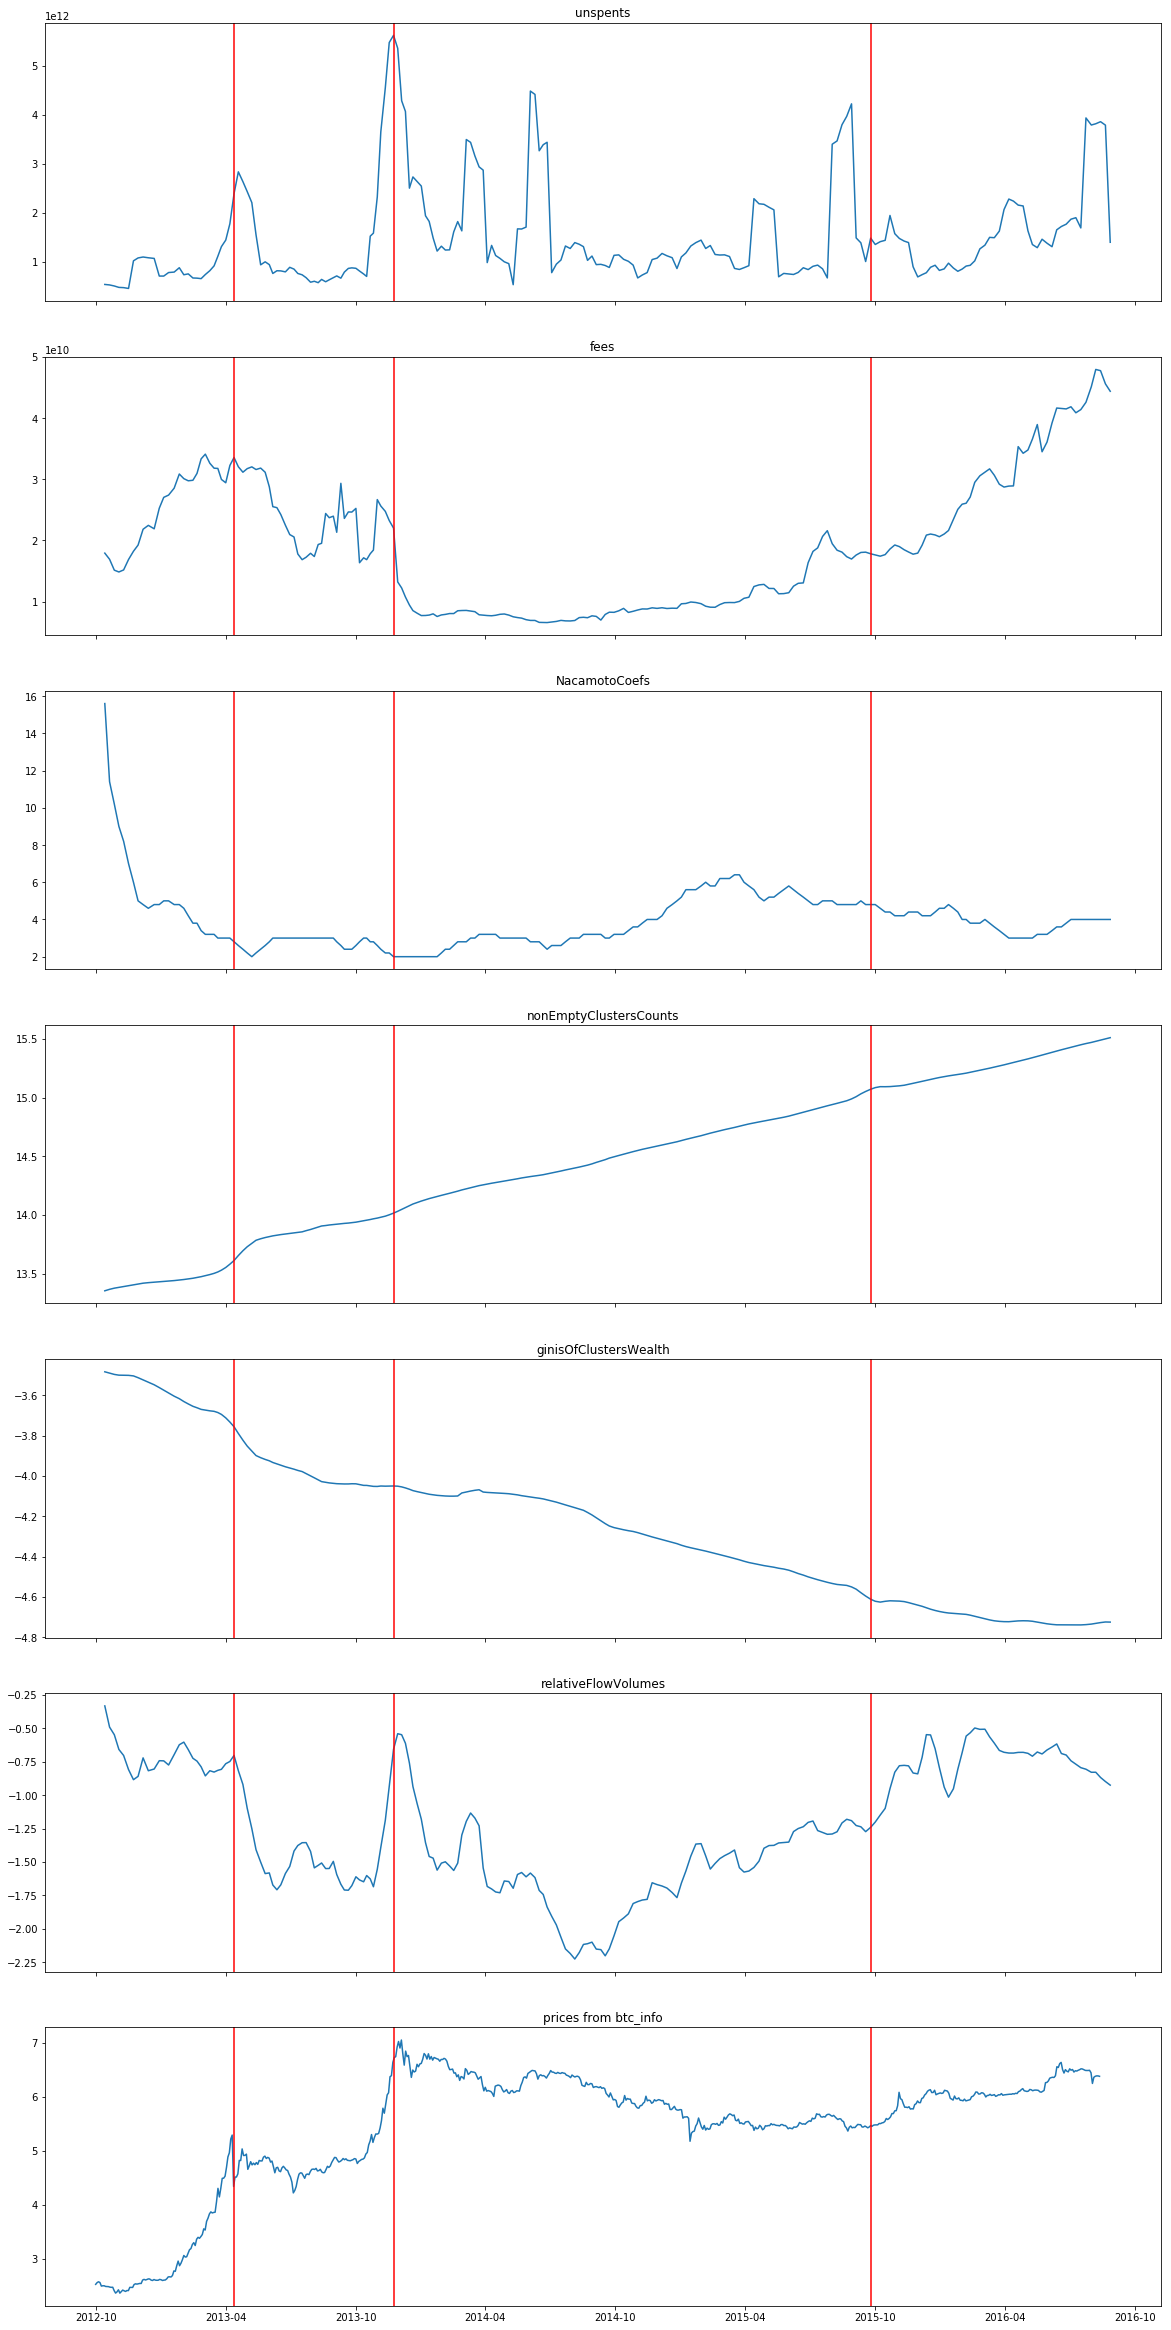

In [32]:
_ = BTC.drawGraph(allMetrics_tag=tag_filtered_b, prices_key='btc_info', begin=200, end=425,
                  vlines=[141, 230, 270, 375, 470])#141, 470

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


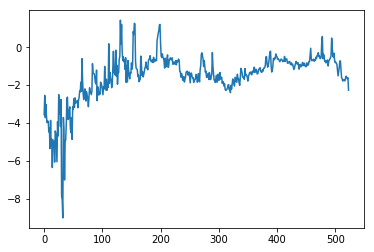

In [11]:
plt.plot(np.log(BTC[S_REL_FLOWS]['nonPar']))

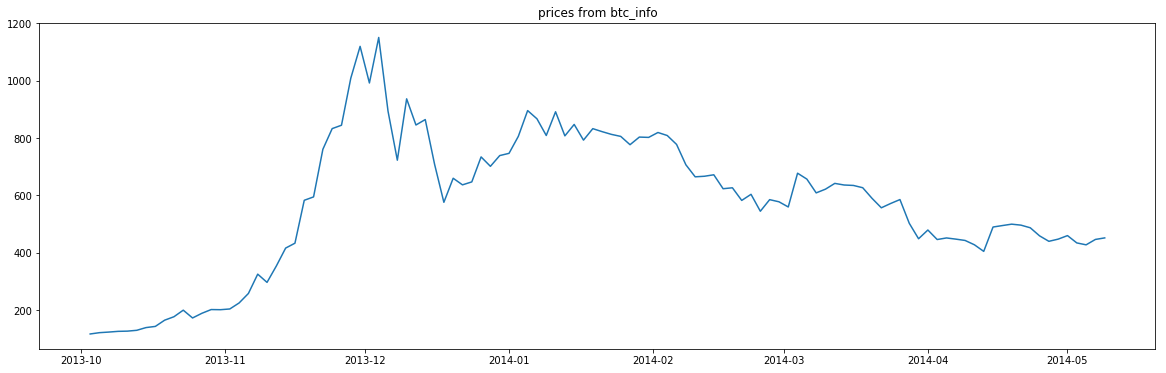

In [128]:
_ = BTC.drawGraph({}, prices_key='btc_info', begin=260, end=300)

In [119]:
_.savefig('bitecoin_win5.png')

In [142]:
unspent_np = np.array(BTC[S_UNSPENTS]['par'])
unspent_np[unspent_np == None] = np.nan

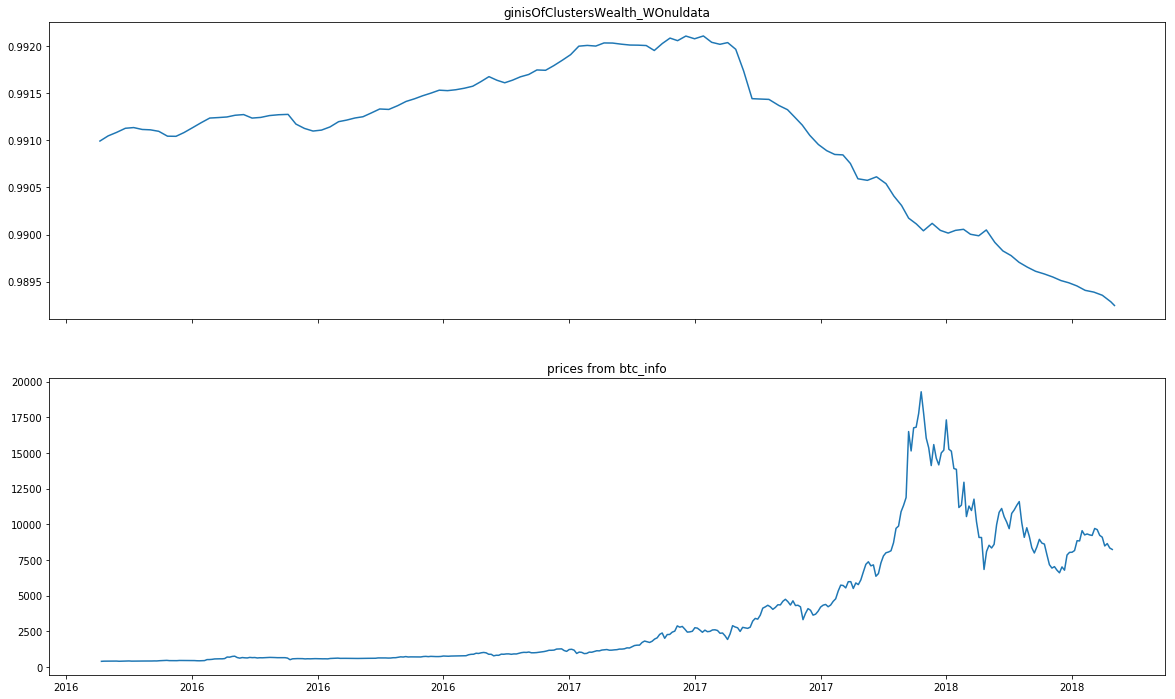

In [9]:
_ = BTC.drawGraph({S_GINIS: 'WOnuldata'}, prices_key='btc_info', begin=400)

In [150]:

unspent_on_flow = unspent_np /  np.array(BTC[S_FLOWS_INCOMES]['nonPar']['incomes'])

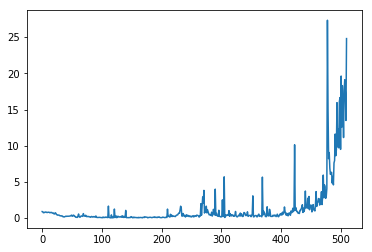

In [151]:
plt.plot(unspent_on_flow)

In [135]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


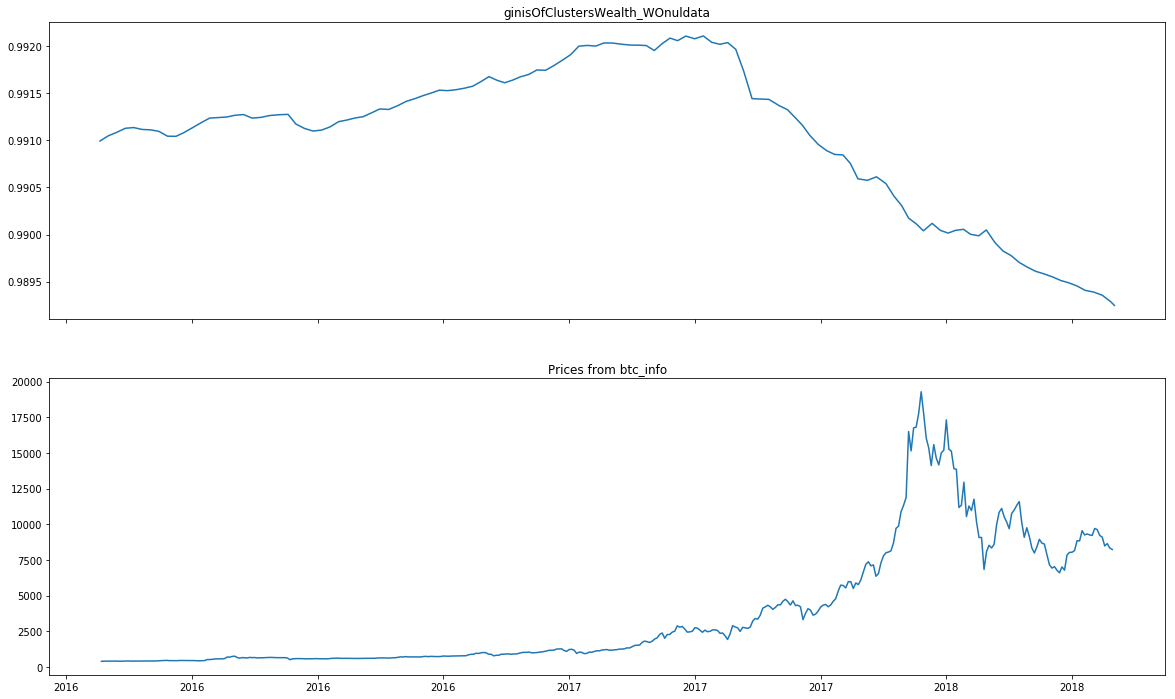

In [122]:
_ = BTC.drawGraph({S_GINIS: 'WOnuldata'}, price_key='btc_info', begin=400)
#_ = BTC.drawGraph({}, price_key='btc_info')

In [16]:
# Q_N
BTC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [20]:
BTC.getNonEmptyClustersCounts('nonPar')

Work time 9297.75s


In [21]:
BTC[S_NONEMPTY_CLS].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_nonEmptyClustersCounts_nonPar" file


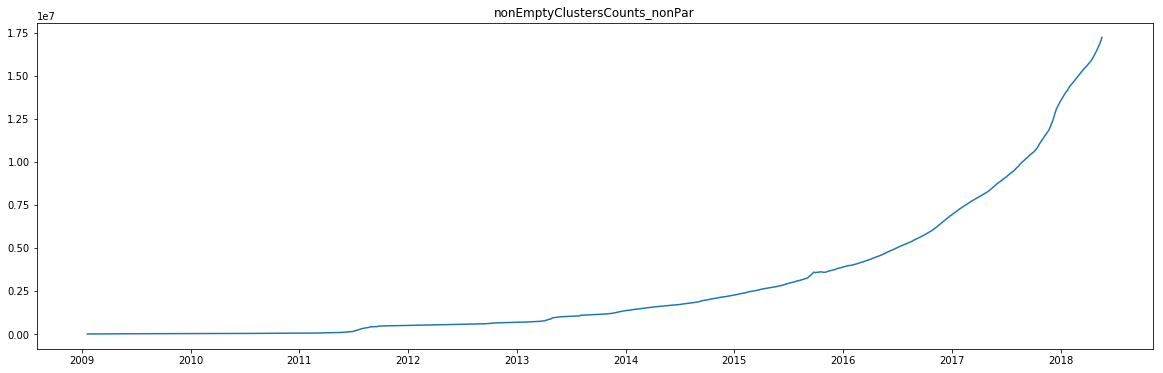

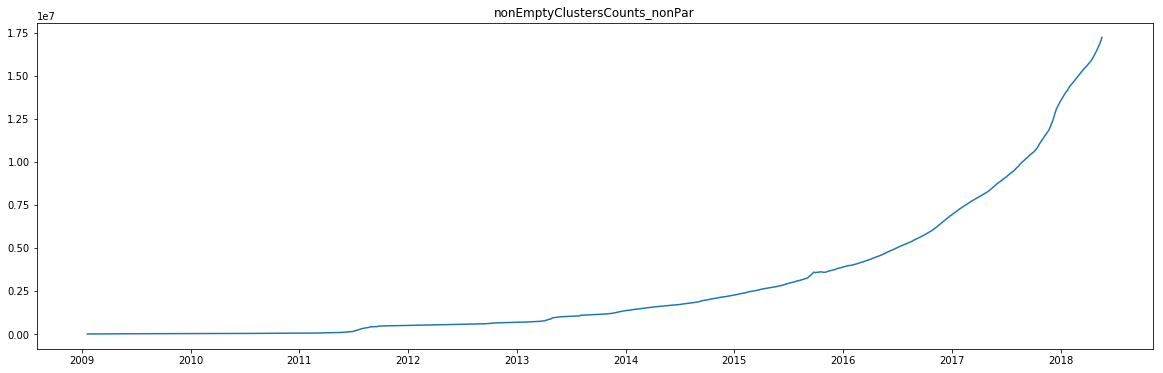

In [22]:
BTC.drawGraph({S_NONEMPTY_CLS: 'nonPar'})

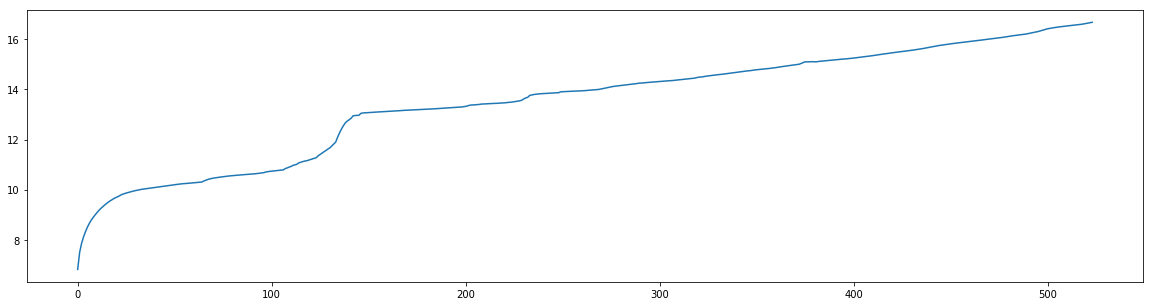

In [23]:
plt.figure(figsize=(20,5))
plt.plot(np.log(np.array(BTC[S_NONEMPTY_CLS]['nonPar'])))

In [120]:
import pandas as pd
prices_b_df = pd.read_csv('~/thesis_work/downloaded/market-price.csv')
#prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= times[-1]]
#prices_m_df[:3]

prices_b_df['2009-01-03 00:00:00'][:3]

0    2009-01-05 00:00:00
1    2009-01-07 00:00:00
2    2009-01-09 00:00:00
Name: 2009-01-03 00:00:00, dtype: object

In [121]:

#prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= times[-1]]

In [10]:
#prices_b_df_cut = prices_b_df[prices_b_df.]
prices_b_df_cut = prices_b_df[pd.to_datetime(prices_b_df['2009-01-03 00:00:00']) <= BTC.times[-1]]


In [12]:
len(prices_b_df)

1723

In [13]:
prices_b_df_cut[-3:]

,2009-01-03 00:00:00,0.0
1708,2018-05-14 00:00:00,8652.038333
1709,2018-05-16 00:00:00,8340.703333
1710,2018-05-18 00:00:00,8240.055000


In [15]:
prices_b_df_to_save_dict = {'times': pd.to_datetime(prices_b_df_cut['2009-01-03 00:00:00']),
                            'prices': prices_b_df_cut['0.0']}

In [5]:
import pandas as pd
prices_b_df = pd.read_csv('~/thesis_work/downloaded/btc-usd-max.csv')
#prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= times[-1]]
#prices_m_df[:3]

prices_b_df[:3]

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0


In [6]:
prices_b_df_to_save_dict = {'times': pd.to_datetime(prices_b_df['snapped_at']),
                            'prices': prices_b_df['price']}

In [7]:
BTC.prices.add('coingecko', pd.DataFrame(prices_b_df_to_save_dict))

In [72]:
BTC.prices.add('btc_info', prices_b_df_to_save)

In [74]:
del BTC.prices.v['btc_info']

In [22]:
BTC.prices['btc_info'].columns

Index(['prices', 'times'], dtype='object')

In [8]:
BTC.prices.save('coingecko', check=False)

Saving "coingecko" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_prices_coingecko" file


In [75]:
BTC.prices.read('btc_info')

In [82]:
BTC.prices['btc_info']['times'][:2]# == prices_b_df_to_save['times']

0    2009-01-05
1    2009-01-07
Name: times, dtype: object

In [81]:
prices_b_df_to_save['times'][:2]

0   2009-01-05
1   2009-01-07
Name: times, dtype: datetime64[ns]

In [59]:
saveCSV(prices_b_df_to_save, 'kutakbash.csv')

In [60]:
betek = readCSV('kutakbash.csv')
betek[:2]

,prices,times
0,0.0,2009-01-05
1,0.0,2009-01-07


In [38]:
saveCSV(betek, 'kutakbash2.csv', index=False)

TypeError: saveCSV() got an unexpected keyword argument 'index'

In [20]:
prices_df = BTC.prices['coingecko']
needed_times = [pd.to_datetime(t.date()) for t in BTC.times]
sync_prices_df = prices_df[pd.to_datetime(prices_df['times']).isin(needed_times)]
sync_prices = list(sync_prices_df['prices'])
sync_prices_with_nones = [None,] * (len(BTC.times) - len(sync_prices)) + sync_prices

In [21]:
sync_prices_with_nones[-5:]

[8825.202500069301,
 9122.65301383019,
 9248.96039558449,
 8473.34864905366,
 8202.82540955214]

In [22]:
sync_prices_df[-5:]

,prices,times
1822,8825.202500,2018-04-26
1829,9122.653014,2018-05-03
1836,9248.960396,2018-05-10
1842,8473.348649,2018-05-16
1845,8202.825410,2018-05-19


In [23]:
BTC.times[-5:]

[datetime.datetime(2018, 4, 26, 10, 28, 11),
 datetime.datetime(2018, 5, 3, 7, 45, 38),
 datetime.datetime(2018, 5, 10, 2, 7, 8),
 datetime.datetime(2018, 5, 16, 19, 37, 44),
 datetime.datetime(2018, 5, 19, 17, 47, 43)]

In [24]:
BTC[S_SYNC_PRICES].v['c_byDay'] = sync_prices_with_nones
BTC[S_SYNC_PRICES].save('c_byDay')

Saving "c_byDay" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_synchronizedPrices_c_byDay" file


In [ ]:
np.corrcoef()

In [57]:
BTC.getFees('nonPar')

Work time 61.37s


In [58]:
BTC[S_FEES].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_fees_nonPar" file


In [59]:
BTC.getRevenues()

Work time 1.59s


In [61]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


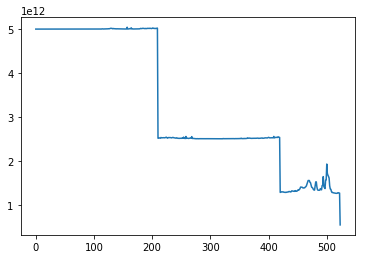

In [63]:
plt.plot(BTC[S_FLOWS_INCOMES]['nonPar_WOFee']['incomes'])

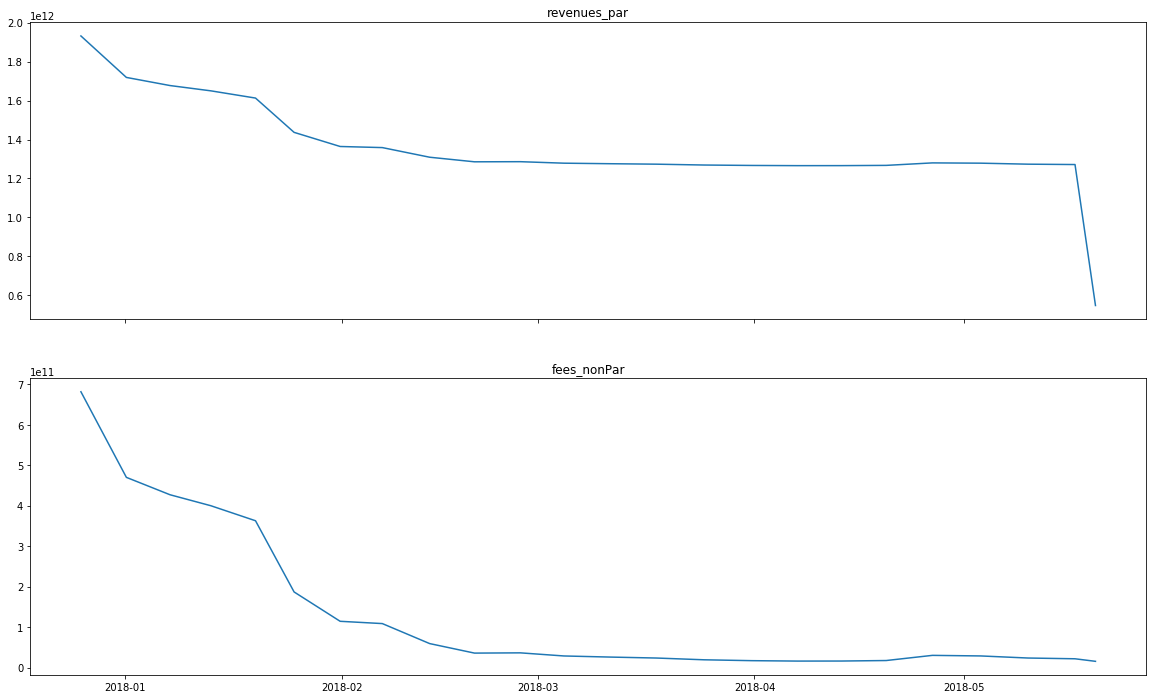

In [67]:
_ = BTC.drawGraph({S_REVENUES:'par', S_FEES:'nonPar'}, begin=500)

In [69]:
%time flowSum_b = checkFlowSum2(BTC.blocks[:500000])

CPU times: user 57min 49s, sys: 0 ns, total: 57min 49s
Wall time: 57min 49s


In [70]:
flowSum_b

0

In [11]:
BTC.chain[200000].fee

63517500

In [12]:
BTC.chain[200000].revenue

5063517500

In [14]:
BTC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [6]:
BTC.getFlowAndIncomeVolume('nonPar')

Work time 11095.46s


In [17]:
# After fix
BTC.getFlowAndIncomeVolume('nonPar')

Work time 9001.3s


In [18]:
BTC[S_FLOWS_INCOMES].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_flowAndIncomeVolumes_nonPar" file


In [22]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
There is already nonPar version of data, stop
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


In [25]:
len(BTC[S_FLOWS_INCOMES]['nonPar']['incomes')# == BTC[S_FLOWS_INCOMES]['nonPar_WOFee']

2

In [20]:
BTC.getRelativeFlowVolumes('nonPar')

Work time 0.0s


In [28]:
BTC[S_REL_FLOWS].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_relativeFlowVolumes_nonPar" file


In [3]:
BTC[S_NCS].readAll()
BTC[S_ADDS_CNTS].readAll()
BTC[S_CLS_CNTS].readAll()
BTC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_activeAddressesCounts'...
  Got 'int1000b_activeAddressesCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_activeClustersCounts'...
  Got 'int1000b_activeClustersCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish


In [4]:
BTC[S_MAP_A2C].read('np')

In [5]:
BTC.getNonEmptyClustersCounts('nonPar', filtering=True)

Work time 9170.5s


In [7]:
BTC[S_NONEMPTY_CLS].save('nonPar_filteringUnspents')

Saving "nonPar_filteringUnspents" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_nonEmptyClustersCounts_nonPar_filteringUnspents" file


In [9]:
BTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_btc_info.csv', key is 'btc_info'
Finish


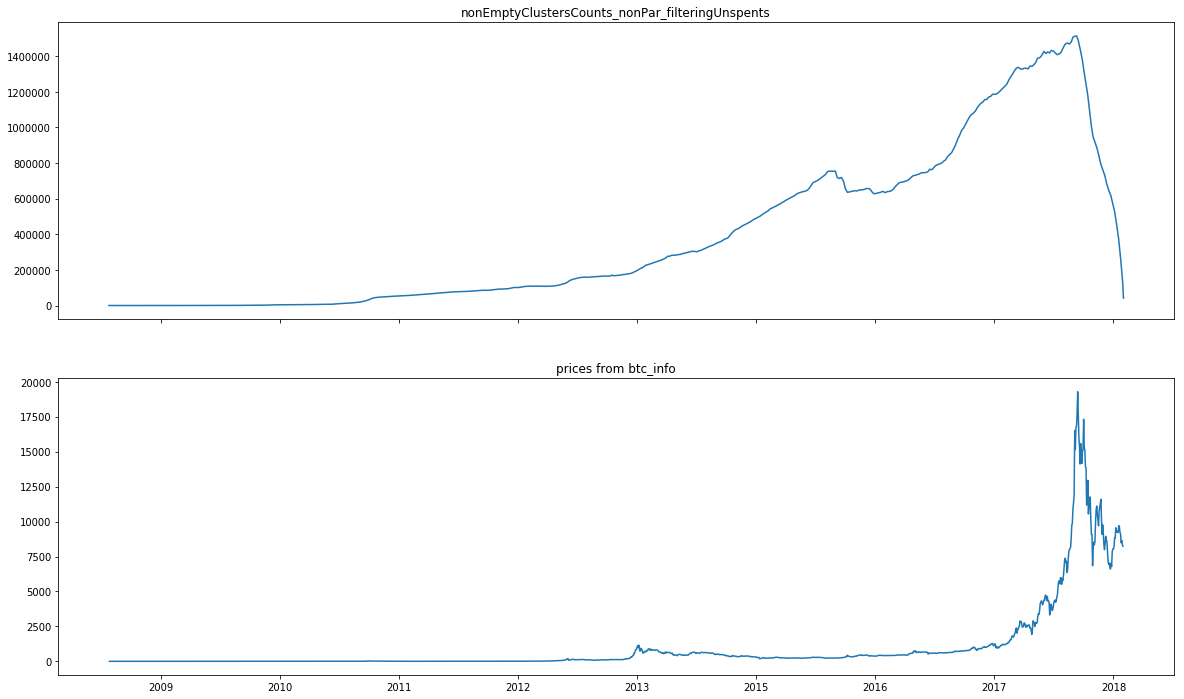

In [10]:
_ = BTC.drawGraph({S_NONEMPTY_CLS: 'nonPar_filteringUnspents'}, prices_key='btc_info')

In [4]:
BTC.getDifficulties()

Work time 0.28s


In [ ]:
#BTC.drawGraph({S_DIFFS:''})

In [11]:
tag_NC = BTC.gatherAllMetrics({S_NCS: ''})

Gathered under tag 'NacamotoCoefs='


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,min_periods=0,halflife=10,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


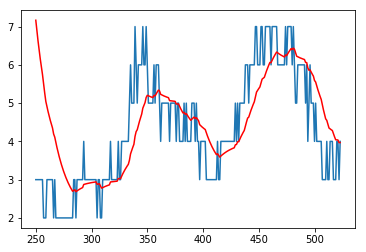

In [20]:
expwighted_avg = pd.ewma(BTC.allMetrics[tag_NC][S_NCS], halflife=10)
plt.plot(BTC.allMetrics[tag_NC][S_NCS][250:])
plt.plot(expwighted_avg[250:], color='red')

In [44]:
from pandas.tools.plotting import lag_plot
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
def my_lag_plot(metric, version, begin=None, lag=1):
    am_tag = BTC.gatherAllMetrics({metric: version})
    plt.figure(figsize=(20, 10))
    lag_plot(BTC.allMetrics[am_tag][metric][begin:], lag=lag)
    plt.show()

Gathered under tag 'relativeFlowVolumes=nonPar'
There is already relativeFlowVolumes=nonPar version of data, stop


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


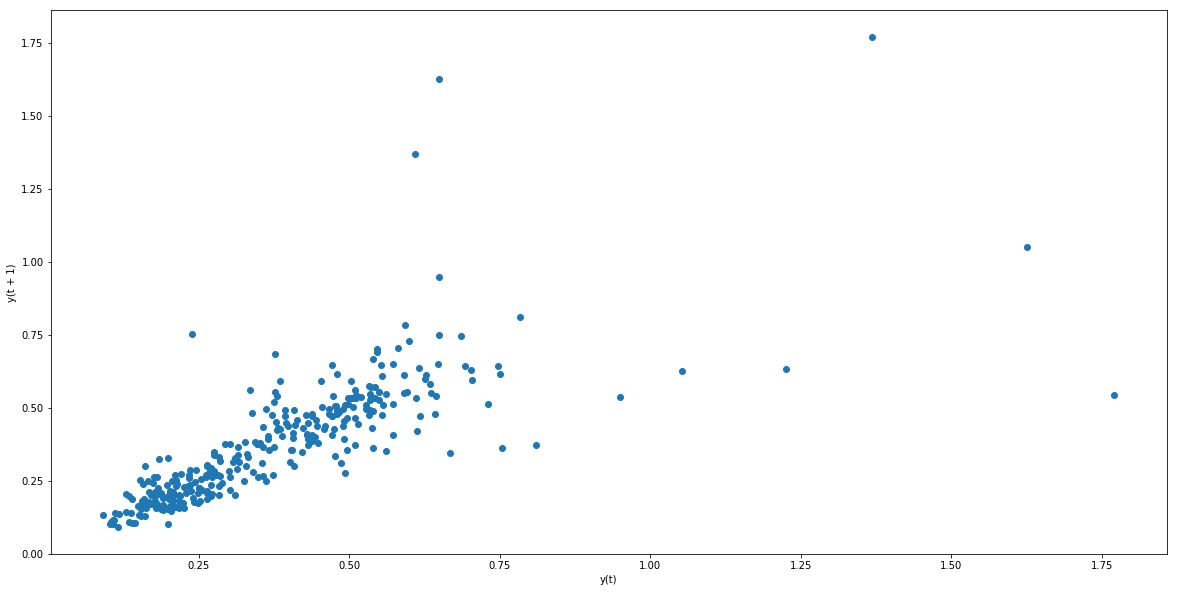

In [51]:
my_lag_plot(S_REL_FLOWS, 'nonPar', begin=200, lag=1)

In [93]:
def getAutoCorrellation(metric, version, begin=None, lag=1):
    values = pd.DataFrame(BTC[metric][version][begin:])
    dataframe = pd.concat([values.shift(lag), values], axis=1)
    columns_names = ['t-{}'.format(lag), 't']
    dataframe.columns = columns_names
    result = dataframe.corr()
    #print(result)
    return result[columns_names[0]][columns_names[1]]

In [94]:
def printAllAutoCorrellations(metrics_dict, begin=None, lag=1):
    for metric, version in metrics_dict.items():
        print("{}_{} :".format(metric, version), getAutoCorrellation(metric, version, begin, lag))

In [95]:
res = getAutoCorrellation(S_REL_FLOWS, 'nonPar', begin=250, lag=2)

In [96]:
res

0.60585606352583021

In [97]:
printAllAutoCorrellations({S_NCS:'', S_GINIS:'WOnuldata', S_REL_FLOWS:'nonPar', S_FEES:'nonPar', S_UNSPENTS:'par'}, begin=250)

fees_nonPar : 0.905646383195
relativeFlowVolumes_nonPar : 0.77432410178
unspents_par : 0.778325124657
ginisOfClustersWealth_WOnuldata : 0.999337781205
NacamotoCoefs_ : 0.911028357676


In [102]:
def autoCorrellationPlot(metric, version, begin=None):
    from pandas.tools.plotting import autocorrelation_plot
    values = pd.DataFrame(BTC[metric][version][begin:])
    plt.figure(figsize=(20, 10))
    autocorrelation_plot(values)
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


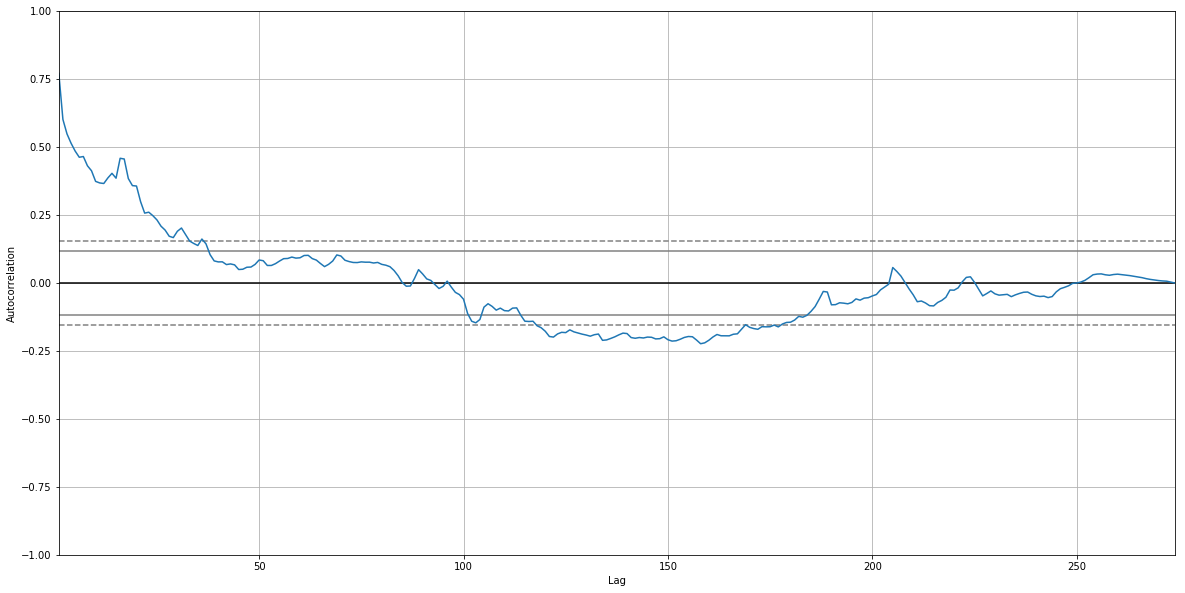

In [104]:
autoCorrellationPlot(S_REL_FLOWS, 'nonPar', 250)

In [1]:
import sklearn

In [55]:
def kutak(metric, version, begin=None, end=None, plot=False):
    from pandas import Series
    from pandas import DataFrame
    from pandas import concat
    from matplotlib import pyplot
    from sklearn.metrics import mean_squared_error
    #series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
    # create lagged dataset
    #values = DataFrame(series.values)
    values = pd.DataFrame(BTC[metric][version][begin:end])
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    # split into train and test sets
    X = dataframe.values
    train, test = X[1:len(X)-7], X[len(X)-7:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    # persistence model
    def model_persistence(x):
        return x

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    test_score = mean_squared_error(test_y, predictions)
    print('Test MSE: %.4f' % test_score)
    # plot predictions vs expected
    if plot:
        pyplot.plot(test_y)
        pyplot.plot(predictions, color='red')
        pyplot.show()

Test MSE: 0.0024


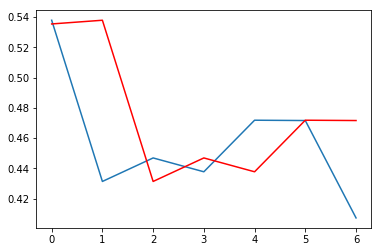

In [58]:
kutak(S_REL_FLOWS, 'nonPar', 250, -100, True)

In [136]:
from sklearn.metrics import mean_squared_error

def betek(metric, version, begin=None, end=None, plot=False):
    from pandas import Series
    from matplotlib import pyplot
    from statsmodels.tsa.ar_model import AR
    from sklearn.metrics import mean_squared_error
    # split dataset
    values = np.array(BTC[metric][version][begin:end])
    X = values
    train, test = X[1:len(X)-7], X[len(X)-7:]
    # train autoregression
    model = AR(train)
    model_fit = model.fit()
    print('Lag: %s' % model_fit.k_ar)
    #print('Coefficients: %s' % model_fit.params)
    # make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    #for i in range(len(predictions)):
    #    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.4f' % error)
    # plot results
    if plot:
        pyplot.plot(test)
        pyplot.plot(predictions, color='red')
        pyplot.show()

In [51]:
betek(S_REL_FLOWS, 'nonPar', 250, -100)

Lag: 14
Test MSE: 0.0046


Test MSE: 0.5714


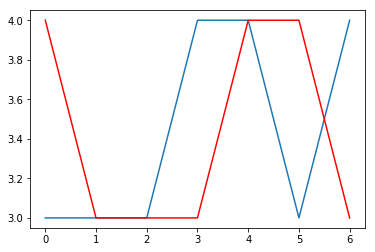

In [56]:
kutak(S_NCS, '', 250, plot=True)

Lag: 15
Test MSE: 0.3322


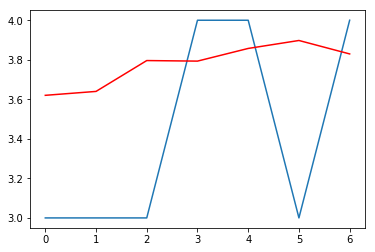

In [57]:
betek(S_NCS, '', 250, plot=True)

In [61]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [65]:
# Q_TS
my_ts = pd.Series(BTC[S_NCS][''][250:])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


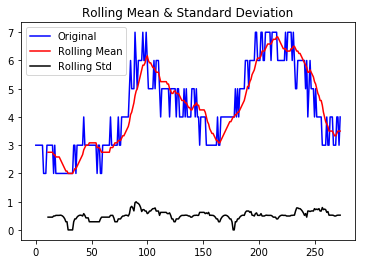

Results of Dickey-Fuller Test:
Test Statistic                  -1.677753
p-value                          0.442610
#Lags Used                       3.000000
Number of Observations Used    270.000000
Critical Value (10%)            -2.572506
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
dtype: float64


In [67]:
test_stationarity(my_ts)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


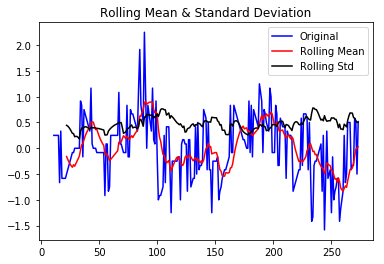

Results of Dickey-Fuller Test:
Test Statistic                  -4.202807
p-value                          0.000652
#Lags Used                       3.000000
Number of Observations Used    259.000000
Critical Value (10%)            -2.572752
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
dtype: float64


In [68]:
moving_avg = pd.rolling_mean(my_ts,12)
ts_moving_avg_diff = my_ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_moving_avg_diff)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


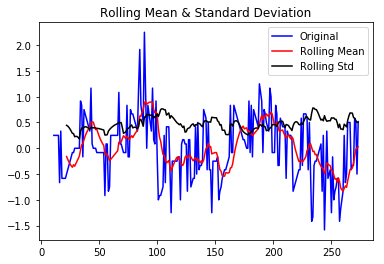

Results of Dickey-Fuller Test:
Test Statistic                  -4.202807
p-value                          0.000652
#Lags Used                       3.000000
Number of Observations Used    259.000000
Critical Value (10%)            -2.572752
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
dtype: float64


In [68]:
expwighted_avg = pd.ewma(my_ts, halflife=12)
ts_moving_ewma_diff = my_ts - expwighted_avg
ts_moving_ewma_diff.dropna(inplace=True)
test_stationarity(ts_moving_ewma_diff)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


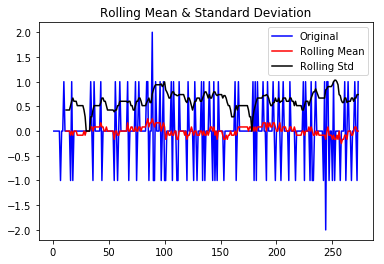

Results of Dickey-Fuller Test:
Test Statistic                -1.417565e+01
p-value                        1.968287e-26
#Lags Used                     2.000000e+00
Number of Observations Used    2.700000e+02
Critical Value (10%)          -2.572506e+00
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
dtype: float64


In [69]:
ts_diff = my_ts - my_ts.shift()
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

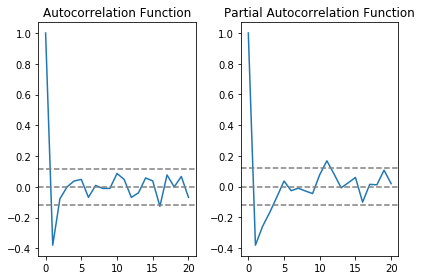

In [152]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5,1,'RSS: 79.7571')

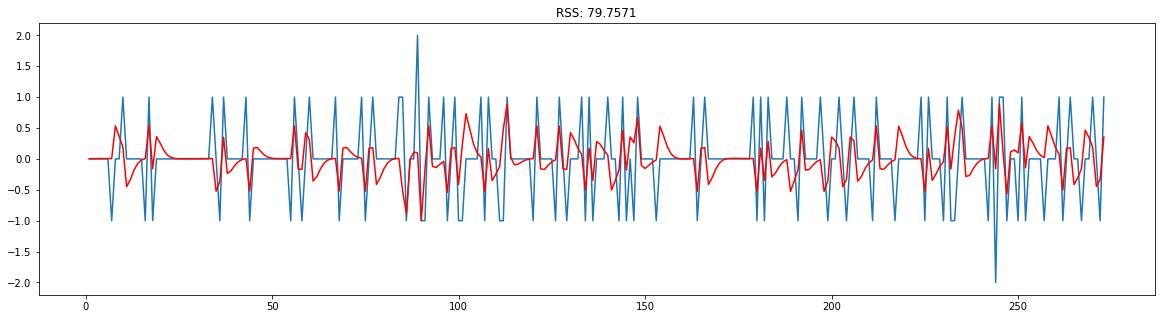

In [105]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(my_ts, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(20, 5))
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

In [107]:
ARIMA_predict = results_ARIMA.predict(typ='levels')

In [113]:
len(my_ts)

274

In [103]:
predictions_ARIMA_diff_cumsum[:2]

1   -0.002610
2   -0.006208
dtype: float64

In [97]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues * (-1), copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA = pd.Series(my_ts.ix[0], index=my_ts.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)

Text(0.5,1,'RMSE: 0.5395')

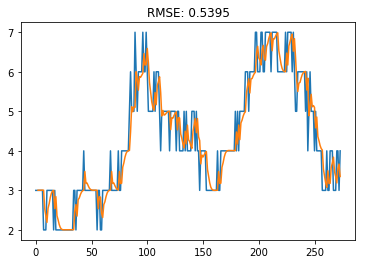

In [114]:
plt.plot(my_ts)
plt.plot(ARIMA_predict)
plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMA_predict-my_ts[2:])**2)/len(my_ts)))

RMSE: 0.5631


0.56314301578976245

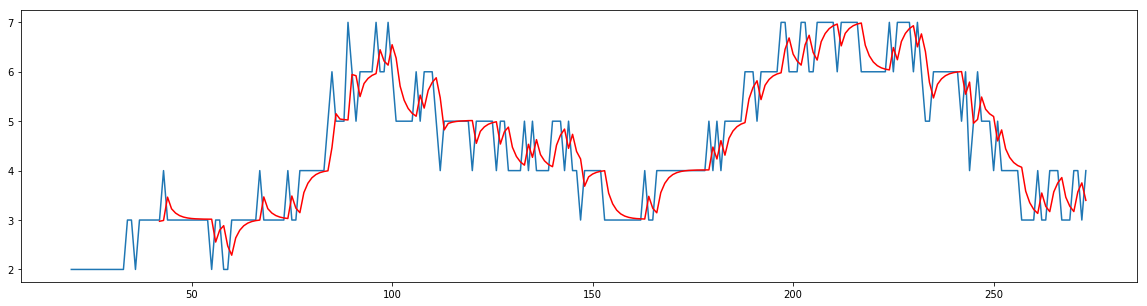

In [192]:
arimaPredictInSampleRMSE(my_ts[20:], (1, 1, 1))

In [72]:
test_df = pd.Series([1, 10, 100, 1000])

In [74]:
pd.ewma(test_df.shift(), halflife=2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=2,adjust=True,ignore_na=False,min_periods=0).mean()
  """Entry point for launching an IPython kernel.


0          NaN
1     1.000000
2     6.272078
3    48.738497
dtype: float64

In [81]:
ewma_prediction = pd.ewma(my_ts.shift(), halflife=12)
ewma_errors = (my_ts - ewma_prediction).dropna()

print('RMSE: %.4f'% np.sqrt(sum((ewma_errors[])**2)/len(ewma_errors)))

RMSE: 0.9134


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,adjust=True,ignore_na=False,min_periods=0).mean()
  """Entry point for launching an IPython kernel.


In [119]:
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(my_ts[:200], order=(2, 1, 2))  
results_ARIMA1 = model1.fit(disp=-1)

ARIMA_predict1 = results_ARIMA1.predict(exog=my_ts[198:], typ='levels')
len(ARIMA_predict1)
#plt.plot(my_ts)
#plt.plot(ARIMA_predict)
#plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMA_predict-my_ts[2:])**2)/len(my_ts)))
#plt.figure(figsize=(20, 5))
#plt.plot(ts_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

198

In [118]:
len(my_ts[198:])

76

In [137]:
def arimaWalkForwardValidation(X, size, arima_order):
    train, test = X[0:size], X[size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('>predicted=%.3f, expected=%.3f' % (float(yhat), float(obs)))
                      
    plt.figure(figsize=(20, 5))
    plt.plot(test)
    plt.plot(predictions, color='red')
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.619
CPU times: user 28min 10s, sys: 49min 45s, total: 1h 17min 55s
Wall time: 9min 48s


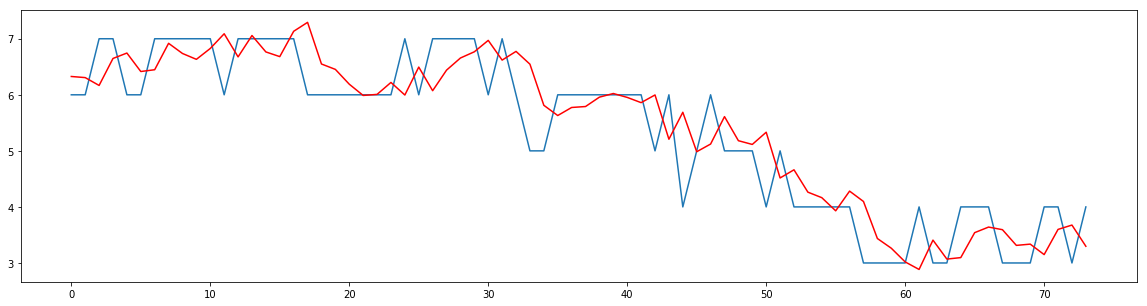

In [153]:
%time arimaWalkForwardValidation(my_ts, size=200, arima_order=(11, 1, 1))

Test RMSE: 0.5583
CPU times: user 50.4 s, sys: 1min 53s, total: 2min 44s
Wall time: 20.6 s


0.55829391737302081

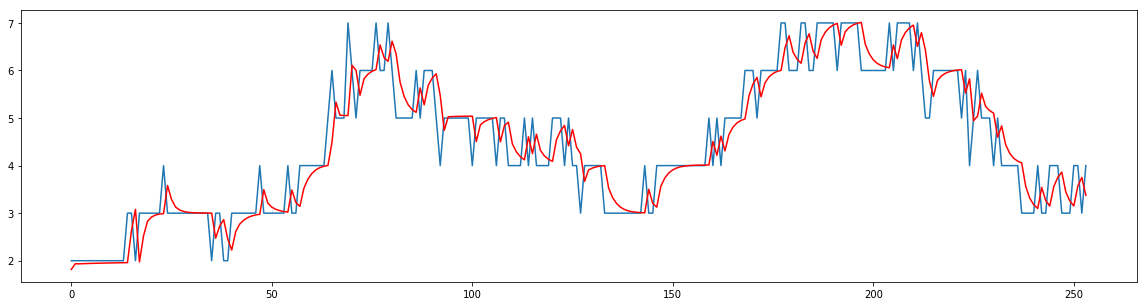

In [189]:
%time arimaWalkForwardValidation(my_ts.values, size=20, arima_order=(1, 1, 1))

In [148]:
def ewmaPreditcionRMSE(series, begin, halflife=12):
    ewma_prediction = pd.ewma(series.shift(), halflife=halflife)
    ewma_errors = (series - ewma_prediction).dropna()[begin:]
    plt.figure(figsize=(20, 5))
    plt.plot(series[begin:])
    plt.plot(ewma_prediction[begin:], color='green')
    print('RMSE: %.4f'% np.sqrt(sum((ewma_errors)**2)/len(ewma_errors)))

In [193]:
ewmaPreditcionRMSE(my_ts, 20, 1, False)

RMSE: 0.5495


/home/ubuntu/thesis_work/my_tools.py:107: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=1,adjust=True,ignore_na=False,min_periods=0).mean()
  ewma_prediction = pd.ewma(series.shift(), halflife=halflife)


0.54953472059926645

In [203]:
relflows = pd.Series(BTC[S_REL_FLOWS]['nonPar'][200:-50])

/home/ubuntu/thesis_work/my_tools.py:21: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  rolmean = pd.rolling_mean(timeseries, window=12)
/home/ubuntu/thesis_work/my_tools.py:22: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  rolstd = pd.rolling_std(timeseries, window=12)


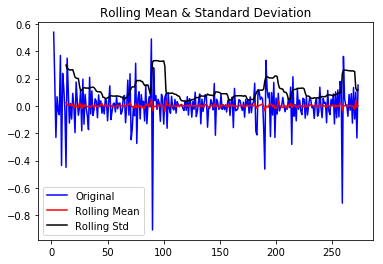

Results of Dickey-Fuller Test:
Test Statistic                -8.127532e+00
p-value                        1.112742e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.550000e+02
Critical Value (10%)          -2.572846e+00
Critical Value (1%)           -3.456257e+00
Critical Value (5%)           -2.872942e+00
dtype: float64


In [208]:
test_stationarity(getDiff(getDiff(relflows)))

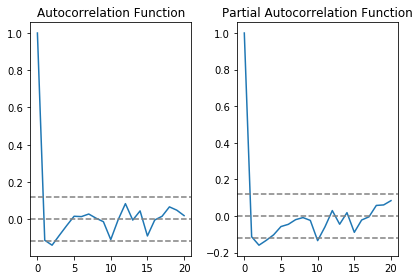

In [205]:
drawAcfPacf(getDiff(relflows))

RMSE: 0.0731


0.073149837147254065

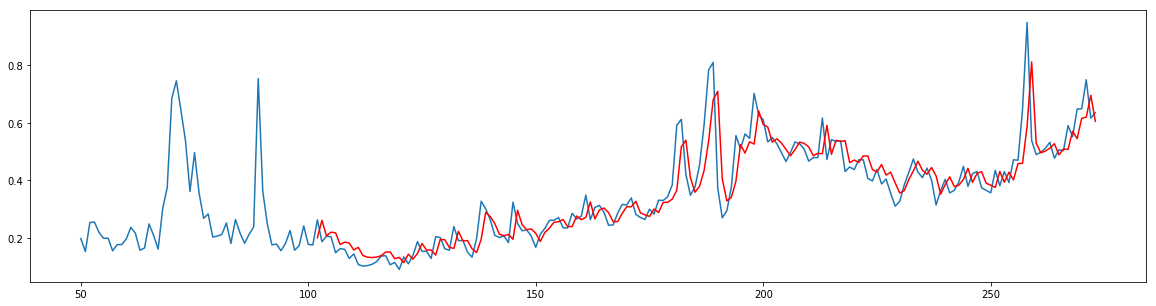

In [206]:
arimaPredictInSampleRMSE(relflows[50:], (1, 1, 1))

RMSE: 0.0721


0.072055132146497863

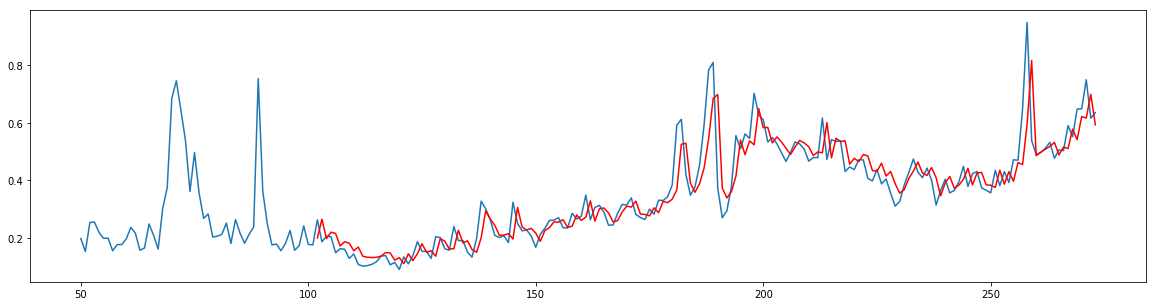

In [213]:
arimaPredictInSampleRMSE(relflows[50:], (2, 1, 1))

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 0.0766
CPU times: user 1min 13s, sys: 2min 14s, total: 3min 28s
Wall time: 39.2 s


0.076569066402420768

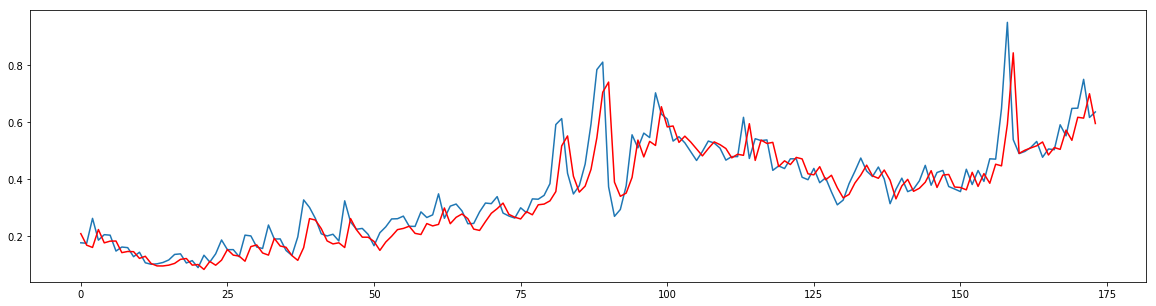

In [215]:
%time arimaWalkForwardValidation(relflows.values, size=100, arima_order=(2, 1, 1))

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 0.0766
CPU times: user 1min 13s, sys: 2min 14s, total: 3min 28s
Wall time: 39.2 s


0.076569066402420768

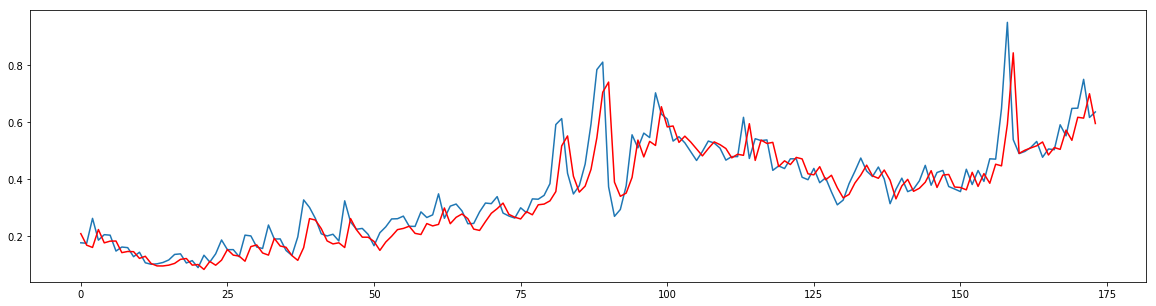

In [215]:
%time arimaWalkForwardValidation(relflows.values, size=100, arima_order=(2, 1, 1))

RMSE: 0.0797


/home/ubuntu/thesis_work/my_tools.py:107: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=1,adjust=True,ignore_na=False,min_periods=0).mean()
  ewma_prediction = pd.ewma(series.shift(), halflife=halflife)


0.079675588595625249

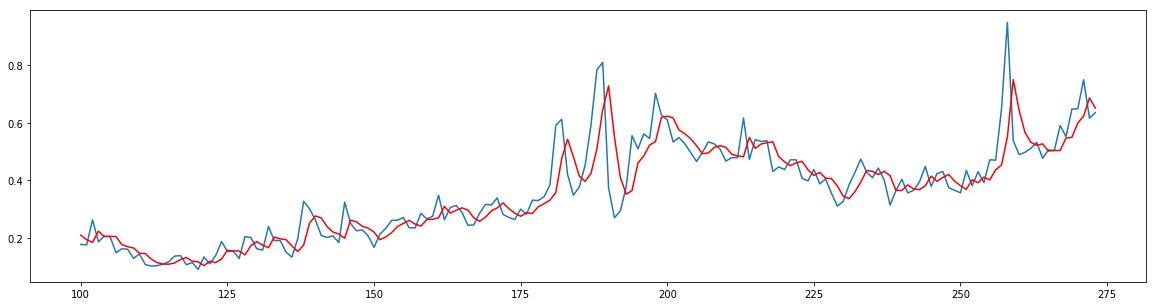

In [221]:
ewmaPreditcionRMSE(relflows, 100, 1)

In [26]:
BTC[S_SYNC_PRICES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_synchronizedPrices'...
  Got 'int1000b_synchronizedPrices_c_byDay.json', key is 'c_byDay'
Finish


In [18]:
first_notNan = 234

import scipy
cprices = np.array(BTC[S_SYNC_PRICES]['c_byDay'], dtype=np.float)
cprices[cprices == None] = np.nan

scipy.stats.pearsonr(cprices[first_notNan:], BTC[S_FEES]['nonPar'][first_notNan:])

KeyError: 'c_byDay'

In [19]:
scipy.stats.pearsonr(BTC[S_GINIS]['log21'], BTC[S_NONEMPTY_CLS]['nonPar'])

(-0.58245224229868608, 6.3919494274270884e-49)

In [29]:
scipy.stats.pearsonr(np.log(cprices[first_notNan:]), np.log(BTC[S_FEES]['nonPar'][first_notNan:]))

(0.59210811377994643, 7.9299791271575323e-29)

In [39]:
scipy.stats.pearsonr(cprices[first_notNan:], BTC[S_GINIS]['WOnuldata'][first_notNan:])

(0.27625381504650898, 1.7757069562449768e-06)

In [38]:
scipy.stats.pearsonr(np.log(cprices[first_notNan:]), np.log(1 - np.array(BTC[S_GINIS]['WOnuldata'][first_notNan:])))

(-0.48965762842770821, 6.821400544591562e-19)

In [63]:
ginis_closeness = np.log(1 - np.array(BTC[S_GINIS]['WOnuldata']))

In [64]:
ginis_diff = getDiff(pd.Series(BTC[S_GINIS]['WOnuldata'][first_notNan:])).values
ginis_closeness_diff = getDiff(pd.Series(ginis_closeness)).values
ginis_closeness_diff = getDiff(pd.Series(ginis_closeness)).values

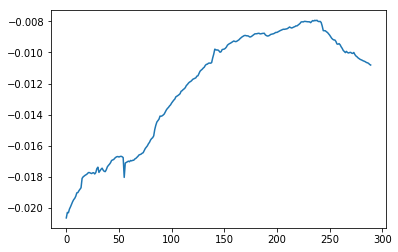

In [34]:
plt.plot(np.log(BTC[S_GINIS]['WOnuldata'][first_notNan:]))

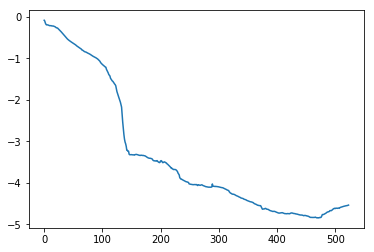

In [65]:
plt.plot(ginis_closeness)

In [70]:
ginis_closeness_diff = getDiff(pd.Series(ginis_closeness)).values

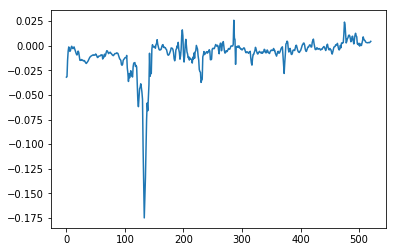

In [72]:
plt.plot(runningMean(ginis_closeness_diff, 3))

In [66]:
scipy.stats.pearsonr(ginis_closeness[150:], BTC[S_REL_FLOWS]['nonPar'][150:])

(0.15713551552078237, 0.0023064738289771893)

In [52]:
meaned_prices = runningMean(cprices[first_notNan:], 3)

In [57]:
meaned_prices_log_diff = getDiff(pd.Series(np.log(meaned_prices))).values

In [61]:
meaned_meaned_prices_log_diff = runningMean(meaned_prices_log_diff, 5)

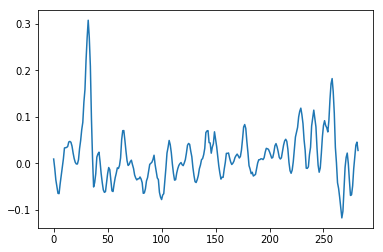

In [62]:
plt.plot(meaned_meaned_prices_log_diff)

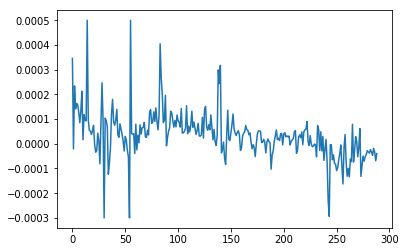

In [43]:
ginis_diff[ginis_diff > 0.0005] = 0.0005
ginis_diff[ginis_diff < -0.0003] = -0.0003
plt.plot(ginis_diff)

In [27]:
BTC[S_CLS_CNTS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_activeClustersCounts'...
  Got 'int1000b_activeClustersCounts.json', key is ''
Finish


In [54]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'nonPar',
                              S_UNSPENTS:'par', S_NONEMPTY_CLS:'log', S_SYNC_PRICES: 'log', S_CLS_CNTS: ''})
tag_mean = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

Gathered under tag 'NacamotoCoefs=_relativeFlowVolumes=log_activeClustersCounts=_fees=nonPar_unspents=par_synchronizedPrices=log_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21'
There is already NacamotoCoefs=_relativeFlowVolumes=log_activeClustersCounts=_fees=nonPar_unspents=par_synchronizedPrices=log_nonEmptyClustersCounts=log_ginisOfClustersWealth=log21 version of data, stop


/home/ubuntu/thesis_work/my_tools.py:1099: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


In [119]:
bdf = BTC.allMetrics[tag_mean].copy()

In [120]:
#bdf['gdiff'] = getDiff(bdf[S_GINIS])
#bdf['cdiff'] = getDiff(bdf[S_NONEMPTY_CLS])

In [121]:
bdf.dropna(inplace=True)

In [122]:
bdf.corr()

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1.000000,0.642472,0.453214,-0.741625,0.712510,0.482283,0.365176,0.202382
activeClustersCounts,0.642472,1.000000,0.848406,-0.779540,0.945163,0.731615,0.852285,0.704133
fees,0.453214,0.848406,1.000000,-0.487271,0.724493,0.544484,0.797380,0.778644
ginisOfClustersWealth,-0.741625,-0.779540,-0.487271,1.000000,-0.910541,-0.755910,-0.506947,-0.275172
nonEmptyClustersCounts,0.712510,0.945163,0.724493,-0.910541,1.000000,0.739532,0.788087,0.611056
relativeFlowVolumes,0.482283,0.731615,0.544484,-0.755910,0.739532,1.000000,0.545088,0.416057
synchronizedPrices,0.365176,0.852285,0.797380,-0.506947,0.788087,0.545088,1.000000,0.833718
unspents,0.202382,0.704133,0.778644,-0.275172,0.611056,0.416057,0.833718,1.000000


In [37]:
import scipy
for col in bdf.columns:
    if col != 'times':
        print(col)
        print(scipy.stats.pearsonr(bdf[S_SYNC_PRICES], bdf[col]))

NacamotoCoefs
(0.36081539034727411, 8.7283394863765234e-10)
activeClustersCounts
(0.85180495916407595, 8.7663214540302073e-78)
fees
(0.79871778613612665, 1.6455049390369509e-61)
ginisOfClustersWealth
(-0.50246236791988175, 8.3202012350820074e-19)
nonEmptyClustersCounts
(0.78642163839392987, 1.9828320075398807e-58)
relativeFlowVolumes
(0.54379695659431693, 2.4701550756552273e-22)
synchronizedPrices
(1.0, 0.0)
unspents
(0.83451068594055289, 7.462907745299693e-72)
pdiff
(0.15237960459713673, 0.011861224854658058)


In [17]:
import scipy
scipy.stats.pearsonr(bdf[S_SYNC_PRICES], bdf[S_NONEMPTY_CLS])

(0.78642163839392987, 1.9828320075398807e-58)

In [118]:
columns = [col for col in bdf.columns if col != 'times']
for comb in itertools.combinations(columns, 2):
        print(list(comb))
        print(scipy.stats.pearsonr(bdf[comb[0]], bdf[comb[1]])[1])

['NacamotoCoefs', 'activeClustersCounts']
3.53538432601e-33
['NacamotoCoefs', 'fees']
3.10979674289e-15
['NacamotoCoefs', 'ginisOfClustersWealth']
6.65006926062e-49
['NacamotoCoefs', 'nonEmptyClustersCounts']
1.35315359505e-43
['NacamotoCoefs', 'relativeFlowVolumes']
2.61414731441e-17
['NacamotoCoefs', 'synchronizedPrices']
4.90152558757e-10
['NacamotoCoefs', 'unspents']
0.000769817866327
['NacamotoCoefs', 'gdiff']
0.000183647970391
['NacamotoCoefs', 'cdiff']
5.71364028578e-06
['activeClustersCounts', 'fees']
7.74681486619e-77
['activeClustersCounts', 'ginisOfClustersWealth']
5.37250122737e-57
['activeClustersCounts', 'nonEmptyClustersCounts']
1.01711902928e-133
['activeClustersCounts', 'relativeFlowVolumes']
5.325009558e-47
['activeClustersCounts', 'synchronizedPrices']
3.05809349935e-78
['activeClustersCounts', 'unspents']
3.45177569328e-42
['activeClustersCounts', 'gdiff']
5.62487320232e-25
['activeClustersCounts', 'cdiff']
2.91326409575e-21
['fees', 'ginisOfClustersWealth']
1.09900

In [69]:
import statsmodels
r = statsmodels.tsa.stattools.grangercausalitytests(bdf[[S_SYNC_PRICES,S_NONEMPTY_CLS]], 10, verbose=False)

In [70]:
r

{1: ({'lrtest': (0.97353057159375567, 0.32380124017420975, 1),
   'params_ftest': (0.9645181531169571, 0.32693361641965346, 269.0, 1.0),
   'ssr_chi2test': (0.97527486114427886, 0.32336815768331473, 1),
   'ssr_ftest': (0.96451815311695221, 0.32693361641965346, 269.0, 1)},
   array([[ 0.,  1.,  0.]])]),
 2: ({'lrtest': (6.2880369671077005, 0.04310921569264569, 2),
   'params_ftest': (3.1220917760468296, 0.04568383504874849, 266.0, 2.0),
   'ssr_chi2test': (6.361555423278114, 0.041553326046146068, 2),
   'ssr_ftest': (3.12209177599996, 0.045683835050841268, 266.0, 2)},
   array([[ 0.,  0.,  1.,  0.,  0.],
          [ 0.,  0.,  0.,  1.,  0.]])]),
 3: ({'lrtest': (8.8010630854705596, 0.032056198184783419, 3),
   'params_ftest': (2.9047137274898582, 0.035283313452973669, 263.0, 3.0),
   'ssr_chi2test': (8.946076499054195, 0.030016486855825891, 3),
   'ssr_ftest': (2.9047137274706829, 0.035283313453863846, 263.0, 3)},
   array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
          [ 0.,  0.,  0., 

In [71]:
r_i = list(r.items())

In [76]:
list(r[1][0].values())[0]

(0.96451815311695221, 0.32693361641965346, 269.0, 1)

In [79]:
def simplifyGrangerResults(res):
    return {k: list(res[k][0].values())[0][:2] for k in res}

In [80]:
simplifyGrangerResults(r)

{1: (0.96451815311695221, 0.32693361641965346),
 2: (3.12209177599996, 0.045683835050841268),
 3: (2.9047137274706829, 0.035283313453863846),
 4: (1.5371345669866878, 0.19178586956705629),
 5: (1.305737683168479, 0.26187651738258205),
 6: (1.1061342511681946, 0.35913315436179644),
 7: (1.4023922660521295, 0.20470272307866572),
 8: (1.1819341195691018, 0.31037622330155634),
 9: (1.2491045560796883, 0.26573360065970125),
 10: (1.1906606769893406, 0.29773007171101923)}

In [110]:
def grangerStatsFromPrice(df, max_lag, to_time=False, max_p=True):
    for col in bdf.columns:
        if not col in (S_SYNC_PRICES, 'times'):
            
            cols_pair = [S_SYNC_PRICES,col] if to_time else [col, S_SYNC_PRICES]
            print(col)
            r = statsmodels.tsa.stattools.grangercausalitytests(\
                bdf[cols_pair], max_lag, verbose=False)
            sr = simplifyGrangerResults(r)
            print(sr)
            if max_p:
                print(max([v[1] for v in sr.values()]))
            else:
                print(min([v[1] for v in sr.values()]))

In [88]:
grangerStatsFromPrice(bdf, 5)

NacamotoCoefs
{1: (6.1276970941993349, 0.013924298760612932), 2: (1.1190882175205759, 0.32811000440497901), 3: (0.52360865083031127, 0.66641065042356695), 4: (1.6227437848035173, 0.1688784487134011), 5: (1.5781770668803574, 0.16659529672520004)}
0.0139242987606
activeClustersCounts
{1: (9.6479698748706326, 0.0020983735944359902), 2: (1.2130713766713037, 0.29892198087577204), 3: (9.064070515611002, 9.8878617736056878e-06), 4: (4.683351918292181, 0.0011491986822413616), 5: (3.7952174702209827, 0.0024696999060943034)}
9.88786177361e-06
fees
{1: (0.71178314710850943, 0.39960209181150297), 2: (17.327620776713747, 8.4354835006006576e-08), 3: (13.942500254205237, 1.8318086691639115e-08), 4: (8.0901732259192798, 3.666812708342345e-06), 5: (6.3690640828980349, 1.3502932195756231e-05)}
1.83180866916e-08
ginisOfClustersWealth
{1: (122.54141819855433, 1.0198528404611356e-23), 2: (2.1172192084025765, 0.1223898301790953), 3: (1.9906305477461923, 0.1157548300458234), 4: (1.9021158677148868, 0.1104816

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


In [94]:
y = np.random.randn(10)
x = np.zeros(10)
x[:-1] = y[1:]
x[-1] = np.random.rand()

In [95]:
x, y

(array([-0.59257791, -0.29667278,  1.09578948,  0.06553253, -0.56810893,
        -1.39680632,  0.33868989,  0.52987755, -1.9557357 ,  0.33935683]),
 array([ 0.50282395, -0.59257791, -0.29667278,  1.09578948,  0.06553253,
        -0.56810893, -1.39680632,  0.33868989,  0.52987755, -1.9557357 ]))

In [103]:
test_df = pd.DataFrame({'y': y, 'x':x})
statsmodels.tsa.stattools.grangercausalitytests(test_df[['y', 'x']], 1, verbose=False)

{1: ({'lrtest': (644.71614600846112, 3.1495786405885013e-142, 1),
   'params_ftest': (7.7426880507368391e+31, 1.4542145530962425e-94, 6.0, 1.0),
   'ssr_chi2test': (1.1614032076105256e+32, 0.0, 1),
   'ssr_ftest': (7.7426880507368382e+31, 1.4542145530962428e-94, 6.0, 1)},
   array([[ 0.,  1.,  0.]])])}

In [102]:
test_df2.columns

Index(['x', 'y'], dtype='object')

In [104]:
ddf = pd.DataFrame()
for col in bdf:
    ddf[col] = getDiff(bdf[col])
ddf.dropna(inplace=True)

In [111]:
grangerStatsFromPrice(ddf, 5)

NacamotoCoefs
{1: (6.1276970941993349, 0.013924298760612932), 2: (1.1190882175205759, 0.32811000440497901), 3: (0.52360865083031127, 0.66641065042356695), 4: (1.6227437848035173, 0.1688784487134011), 5: (1.5781770668803574, 0.16659529672520004)}
0.666410650424
activeClustersCounts
{1: (9.6479698748706326, 0.0020983735944359902), 2: (1.2130713766713037, 0.29892198087577204), 3: (9.064070515611002, 9.8878617736056878e-06), 4: (4.683351918292181, 0.0011491986822413616), 5: (3.7952174702209827, 0.0024696999060943034)}
0.298921980876
fees
{1: (0.71178314710850943, 0.39960209181150297), 2: (17.327620776713747, 8.4354835006006576e-08), 3: (13.942500254205237, 1.8318086691639115e-08), 4: (8.0901732259192798, 3.666812708342345e-06), 5: (6.3690640828980349, 1.3502932195756231e-05)}
0.399602091812
ginisOfClustersWealth
{1: (122.54141819855433, 1.0198528404611356e-23), 2: (2.1172192084025765, 0.1223898301790953), 3: (1.9906305477461923, 0.1157548300458234), 4: (1.9021158677148868, 0.11048167250020

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


In [108]:
grangerStatsFromPrice(ddf, 3, True)

NacamotoCoefs
{1: (1.0628308714368104, 0.30349643657957237), 2: (1.0965457373223126, 0.33552792813827037), 3: (2.2893081252124761, 0.078809679914727065)}
0.0788096799147
activeClustersCounts
{1: (12.102397862947406, 0.00058719170301276349), 2: (4.1815273493795093, 0.016291044922834244), 3: (3.0688925359980121, 0.028421954900341925)}
0.000587191703013
fees
{1: (0.25838183380198265, 0.61165063520212171), 2: (0.094041433708115199, 0.91027529609885838), 3: (0.90095969492408623, 0.44121647988047386)}
0.44121647988
ginisOfClustersWealth
{1: (1.3735699686055691, 0.24223640109600769), 2: (8.3086049286029819, 0.00031611366758424713), 3: (4.686878019110666, 0.0033066607477193134)}
0.000316113667584
nonEmptyClustersCounts
{1: (0.96451815311695221, 0.32693361641965346), 2: (3.12209177599996, 0.045683835050841268), 3: (2.9047137274706829, 0.035283313453863846)}
0.0352833134539
relativeFlowVolumes
{1: (52.393600225220609, 4.7625729206730187e-12), 2: (12.423822683678814, 6.9460711679536663e-06), 3: (